# DOES PADDING AFFECT THE PERFORMANCES OF THE MODEL?

In [1]:
from libraries import *
from my_functions import *

In [2]:
dataframe=load_data()
dataframe.head()


[INFO] Loading data


,X,Y,area,perimeter,roi,image,category,Brep,Trep,group,chemistry,path_decon,path_raw,expected,1,2,3,4
0,462.658045,123.805411,200.299,53.891,2,1,OFQv67_w3,OFQv67,w3,36plex-1K eLIT,JEB,../20190204_OFQv67/detect_toto_w3/OFQv67_w3_1_...,merged/OFQv67/w3/1/roi_2.tif,66,10,58,61,54
1,366.437019,411.463645,191.621,52.759,5,1,OFQv67_w3,OFQv67,w3,36plex-1K eLIT,JEB,../20190204_OFQv67/detect_toto_w3/OFQv67_w3_1_...,merged/OFQv67/w3/1/roi_5.tif,66,13,55,60,54
2,196.810109,88.081063,131.091,43.654,2,2,OFQv67_w3,OFQv67,w3,36plex-1K eLIT,JEB,../20190204_OFQv67/detect_toto_w3/OFQv67_w3_2_...,merged/OFQv67/w3/2/roi_2.tif,66,18,59,59,58
3,398.738159,94.008875,175.333,51.952,3,2,OFQv67_w3,OFQv67,w3,36plex-1K eLIT,JEB,../20190204_OFQv67/detect_toto_w3/OFQv67_w3_2_...,merged/OFQv67/w3/2/roi_3.tif,66,16,60,59,56
4,150.306217,164.407736,117.149,40.415,4,2,OFQv67_w3,OFQv67,w3,36plex-1K eLIT,JEB,../20190204_OFQv67/detect_toto_w3/OFQv67_w3_2_...,merged/OFQv67/w3/2/roi_4.tif,66,18,64,61,52


In [52]:
model4 = keras.models.load_model('../Model9_r4_fold1')
rounds_used=4
test_index=np.load("../../test_index.npy")
val_index=np.load("../../fold1.npy")
train_index=np.load("../../train_index.npy")
mask = np.isin(train_index, val_index)
train=train_index[~mask]

In [62]:
def scatter_plot(preds, y_test, dataframe, use_round):
    print(colored("[INFO]", "cyan"), "plotting results ...", end=" ")
    fig, (ax1) = plt.subplots(1, 1, figsize=(15, 10))
    fig.set_figheight(7)
    fig.set_figwidth(15)

    fig.suptitle('Number of rounds: '+str(use_round), fontsize=15)
    
    cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
    ax1.set_aspect('equal')
    sns.scatterplot(x=np.asarray(y_test), y=np.asarray(preds)[:,0],
                    hue=dataframe["color"].tolist()
                   )


    ax1.set_title("Observed vs. Predicted perc detection",
                    fontsize=13, pad=20)

    ax1.set_ylabel("Predicted %",
                     fontsize=20)

    ax1.set_xlabel('Observed %',
                     fontsize=20)

    ax1.tick_params(labelsize=18)

    lims = [0, 1.1]
    ax1.set_xlim(lims)
    ax1.set_ylim(lims)
    _=ax1.plot(lims,lims, '--', color="0.8", dashes=(5, 5))
    #plt.savefig(approach+result_model_name)
    return plt

In [63]:
threshold=0.5
images_test = pd.DataFrame(columns=["image_array", "image", "roi", "category", "area", "perimeter", "chemistry", "X", "Y", "file", 'expected', 'observed_r1', 'observed_r2', 'observed_r3', 'observed_r4', "group"])
images_val = pd.DataFrame(columns=["image_array", "image", "roi", "category", "area", "perimeter", "chemistry", "X", "Y", "file", 'expected', 'observed_r1', 'observed_r2', 'observed_r3', 'observed_r4', "group"])
images_test=prepare_test(dataframe, images_test, test_index, 4, rounds_used, 150, False, group="test dataset")
images_val=prepare_test(dataframe, images_val, val_index, 4, rounds_used, 150, False, group="validation dataset")
frames = [images_test, images_val]
result = pd.concat(frames)
x_test, y_test=prepare_dataset_1(images_val, rounds_used)
auc, fpr, tpr, thresholds, loss, preds=evaluate_model(x_test, y_test, model4, threshold)

9/9 [==============================] - 0s 42ms/step - loss: 0.0123
[METRICS] Loss:  0.012349355965852737
[METRICS] ROC AUC=0.924


[INFO] plotting results ... 

<module 'matplotlib.pylab' from '/home/amarti/anaconda3/envs/tf2/lib/python3.8/site-packages/matplotlib/pylab.py'>

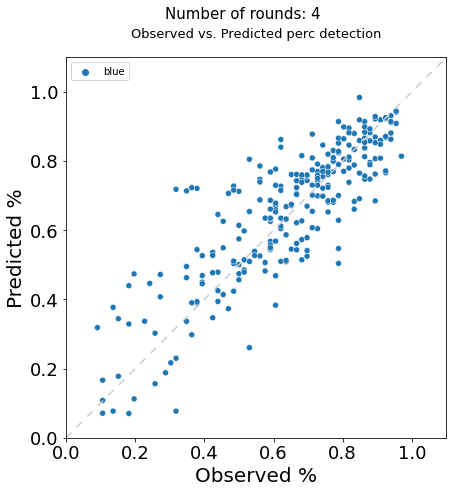

In [64]:
images_val["color"]="blue"
scatter_plot(preds.tolist(), y_test, images_val, 4)

In [65]:
area=images_val["area"].tolist()
error=[abs(a_i - b_i) for a_i, b_i in zip(np.asarray(y_test), np.asarray(preds)[:,0])]

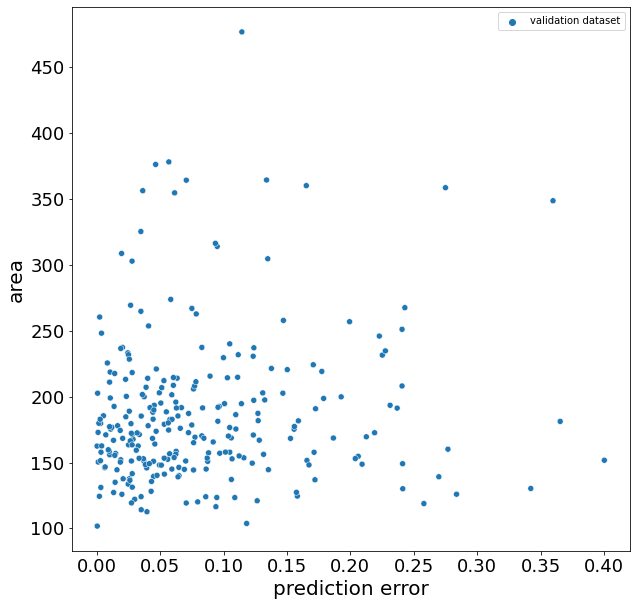

In [66]:
c=images_val["group"].tolist()
images_val["color"]=c
fig, (ax1) = plt.subplots(1, 1, figsize=(1, 1))
fig.set_figheight(10)
fig.set_figwidth(10)

cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
#ax1.set_aspect('equal')
sns.scatterplot(x=np.asarray(error), y=np.asarray(area),
                hue=images_val["color"].tolist()
               )

ax1.set_ylabel("area",
                 fontsize=20)

ax1.set_xlabel('prediction error',
                 fontsize=20)

ax1.tick_params(labelsize=18)

limsy = [0, 400]
#ax1.set_xlim([0, 1])
#ax1.set_ylim([0, 400])
#_=ax1.plot(lims,lims, '--', color="0.8", dashes=(5, 5))

In [68]:
from numpy.random import randn
from numpy.random import seed
from scipy.stats import pearsonr
# seed random number generator
seed(1)
# prepare data
# calculate Pearson's correlation
corr, _ = pearsonr(area, error)
print('Pearsons correlation: %.3f' % corr)
print('Pearsons p_val: %.3f' % _)

Pearsons correlation: 0.098
Pearsons p_val: 0.114


The coefficient returns a value between -1 and 1 that represents the limits of correlation from a full negative correlation to a full positive correlation. A value of 0 means no correlation. The value must be interpreted, where often a value below -0.5 or above 0.5 indicates a notable correlation, and values below those values suggests a less notable correlation.



CONCLUSION: the size of the cell is not affecting the predictions of the model. Hence, the paddig that is added to each image is not affecting either, since padding and cell size are inversely correlated.

9/9 [==============================] - 0s 39ms/step - loss: 0.0096
[METRICS] Loss:  0.009626414626836777
[METRICS] ROC AUC=0.966
[INFO] plotting results ... 

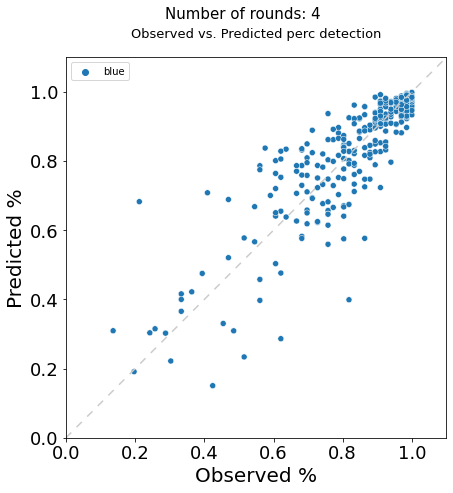

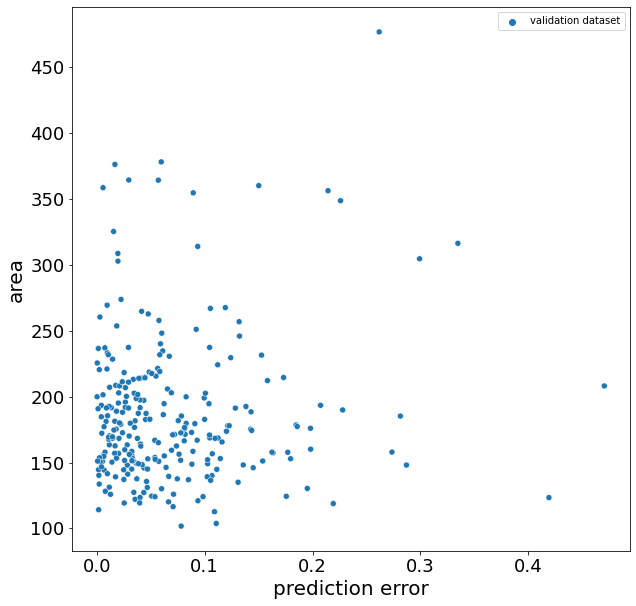

Pearsons correlation: 0.105
Pearsons p_val: 0.089


In [69]:
model = keras.models.load_model('../Model9_r3_fold1')
rounds_used=3
test_index=np.load("../../test_index.npy")
val_index=np.load("../../fold1.npy")
train_index=np.load("../../train_index.npy")
mask = np.isin(train_index, val_index)
train=train_index[~mask]
threshold=0.5

images_test = pd.DataFrame(columns=["image_array", "image", "roi", "category", "area", "perimeter", "chemistry", "X", "Y", "file", 'expected', 'observed_r1', 'observed_r2', 'observed_r3', 'observed_r4', "group"])
images_val = pd.DataFrame(columns=["image_array", "image", "roi", "category", "area", "perimeter", "chemistry", "X", "Y", "file", 'expected', 'observed_r1', 'observed_r2', 'observed_r3', 'observed_r4', "group"])
images_test=prepare_test(dataframe, images_test, test_index, 4, rounds_used, 150, False, group="test dataset")
images_val=prepare_test(dataframe, images_val, val_index, 4, rounds_used, 150, False, group="validation dataset")
frames = [images_test, images_val]
result = pd.concat(frames)

x_test, y_test=prepare_dataset_1(images_val, rounds_used)
auc, fpr, tpr, thresholds, loss, preds=evaluate_model(x_test, y_test, model, threshold)

images_val["color"]="blue"
scatter_plot(preds.tolist(), y_test, images_val, 4)

area=images_val["area"].tolist()
error=[abs(a_i - b_i) for a_i, b_i in zip(np.asarray(y_test), np.asarray(preds)[:,0])]


c=images_val["group"].tolist()
images_val["color"]=c
fig, (ax1) = plt.subplots(1, 1, figsize=(1, 1))
fig.set_figheight(10)
fig.set_figwidth(10)

cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
#ax1.set_aspect('equal')
sns.scatterplot(x=np.asarray(error), y=np.asarray(area),
                hue=images_val["color"].tolist()
               )

ax1.set_ylabel("area",
                 fontsize=20)

ax1.set_xlabel('prediction error',
                 fontsize=20)

ax1.tick_params(labelsize=18)

limsy = [0, 400]
#ax1.set_xlim([0, 1])
#ax1.set_ylim([0, 400])
#_=ax1.plot(lims,lims, '--', color="0.8", dashes=(5, 5))
plt.show()

from numpy.random import randn
from numpy.random import seed
from scipy.stats import pearsonr
# calculate Pearson's correlation
corr, _ = pearsonr(area, error)
print('Pearsons correlation: %.3f' % corr)
print('Pearsons p_val: %.3f' % _)


9/9 [==============================] - 0s 38ms/step - loss: 0.0086
[METRICS] Loss:  0.008575589396059513
[METRICS] ROC AUC=0.898
[INFO] plotting results ... 

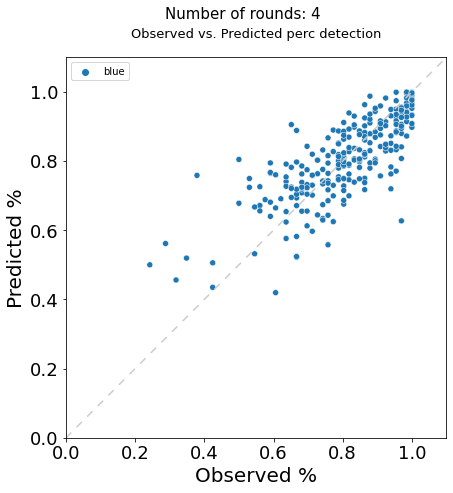

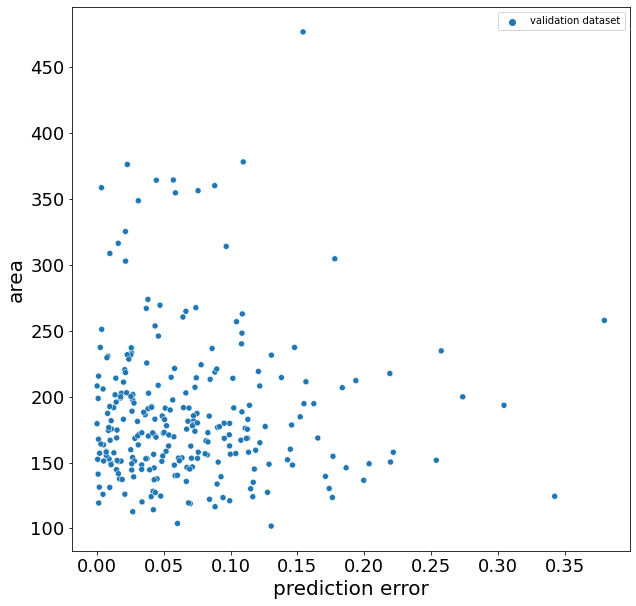

Pearsons correlation: -0.0004
Pearsons p_val: 0.995


In [70]:
model = keras.models.load_model('../Model9_r2_fold1')
rounds_used=2
test_index=np.load("../../test_index.npy")
val_index=np.load("../../fold1.npy")
train_index=np.load("../../train_index.npy")
mask = np.isin(train_index, val_index)
train=train_index[~mask]
threshold=0.5

images_test = pd.DataFrame(columns=["image_array", "image", "roi", "category", "area", "perimeter", "chemistry", "X", "Y", "file", 'expected', 'observed_r1', 'observed_r2', 'observed_r3', 'observed_r4', "group"])
images_val = pd.DataFrame(columns=["image_array", "image", "roi", "category", "area", "perimeter", "chemistry", "X", "Y", "file", 'expected', 'observed_r1', 'observed_r2', 'observed_r3', 'observed_r4', "group"])
images_test=prepare_test(dataframe, images_test, test_index, 4, rounds_used, 150, False, group="test dataset")
images_val=prepare_test(dataframe, images_val, val_index, 4, rounds_used, 150, False, group="validation dataset")
frames = [images_test, images_val]
result = pd.concat(frames)

x_test, y_test=prepare_dataset_1(images_val, rounds_used)
auc, fpr, tpr, thresholds, loss, preds=evaluate_model(x_test, y_test, model, threshold)

images_val["color"]="blue"
scatter_plot(preds.tolist(), y_test, images_val, 4)

area=images_val["area"].tolist()
error=[abs(a_i - b_i) for a_i, b_i in zip(np.asarray(y_test), np.asarray(preds)[:,0])]


c=images_val["group"].tolist()
images_val["color"]=c
fig, (ax1) = plt.subplots(1, 1, figsize=(1, 1))
fig.set_figheight(10)
fig.set_figwidth(10)

cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
#ax1.set_aspect('equal')
sns.scatterplot(x=np.asarray(error), y=np.asarray(area),
                hue=images_val["color"].tolist()
               )

ax1.set_ylabel("area",
                 fontsize=20)

ax1.set_xlabel('prediction error',
                 fontsize=20)

ax1.tick_params(labelsize=18)

limsy = [0, 400]
#ax1.set_xlim([0, 1])
#ax1.set_ylim([0, 400])
#_=ax1.plot(lims,lims, '--', color="0.8", dashes=(5, 5))
plt.show()

from numpy.random import randn
from numpy.random import seed
from scipy.stats import pearsonr
# calculate Pearson's correlation
corr, _ = pearsonr(area, error)
print('Pearsons correlation: %.4f' % corr)
print('Pearsons p_val: %.3f' % _)



9/9 [==============================] - 0s 24ms/step - loss: 0.0091
[METRICS] Loss:  0.00907785166054964
[METRICS] ROC AUC=0.923
[INFO] plotting results ... 

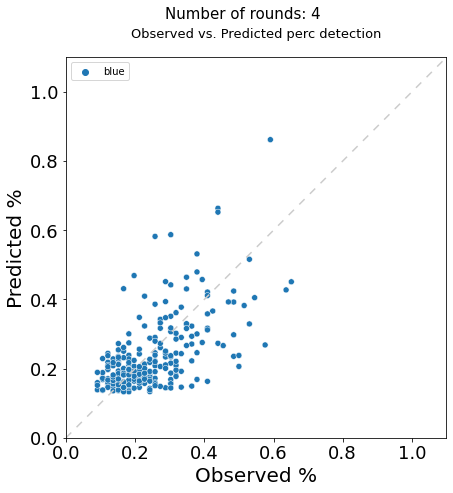

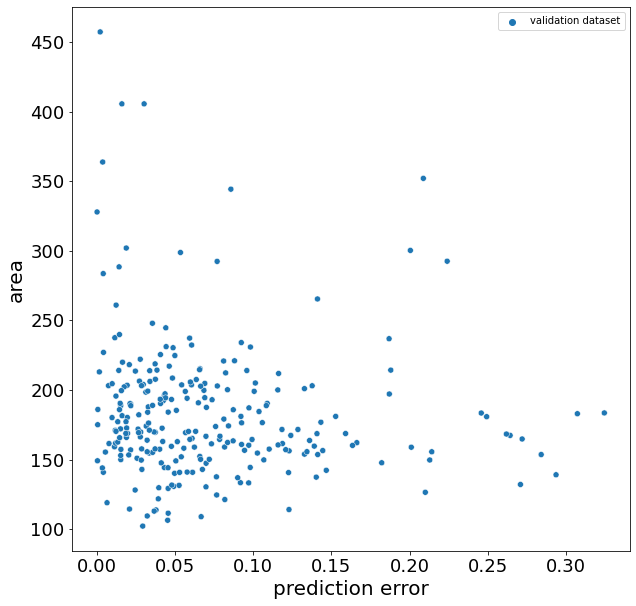

Pearsons correlation: -0.0900
Pearsons p_val: 0.147


In [71]:
model = keras.models.load_model('../../approach15/Model9_r1_fold4')
rounds_used=1
test_index=np.load("../../test_index.npy")
val_index=np.load("../../fold4.npy")
train_index=np.load("../../train_index.npy")
mask = np.isin(train_index, val_index)
train=train_index[~mask]
threshold=0.5

images_test = pd.DataFrame(columns=["image_array", "image", "roi", "category", "area", "perimeter", "chemistry", "X", "Y", "file", 'expected', 'observed_r1', 'observed_r2', 'observed_r3', 'observed_r4', "group"])
images_val = pd.DataFrame(columns=["image_array", "image", "roi", "category", "area", "perimeter", "chemistry", "X", "Y", "file", 'expected', 'observed_r1', 'observed_r2', 'observed_r3', 'observed_r4', "group"])
images_test=prepare_test(dataframe, images_test, test_index, 4, rounds_used, 150, False, group="test dataset")
images_val=prepare_test(dataframe, images_val, val_index, 4, rounds_used, 150, False, group="validation dataset")
frames = [images_test, images_val]
result = pd.concat(frames)

x_test, y_test=prepare_dataset_1(images_val, rounds_used)
auc, fpr, tpr, thresholds, loss, preds=evaluate_model(x_test, y_test, model, threshold)

images_val["color"]="blue"
scatter_plot(preds.tolist(), y_test, images_val, 4)

area=images_val["area"].tolist()
error=[abs(a_i - b_i) for a_i, b_i in zip(np.asarray(y_test), np.asarray(preds)[:,0])]


c=images_val["group"].tolist()
images_val["color"]=c
fig, (ax1) = plt.subplots(1, 1, figsize=(1, 1))
fig.set_figheight(10)
fig.set_figwidth(10)

cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
#ax1.set_aspect('equal')
sns.scatterplot(x=np.asarray(error), y=np.asarray(area),
                hue=images_val["color"].tolist()
               )

ax1.set_ylabel("area",
                 fontsize=20)

ax1.set_xlabel('prediction error',
                 fontsize=20)

ax1.tick_params(labelsize=18)

limsy = [0, 400]
#ax1.set_xlim([0, 1])
#ax1.set_ylim([0, 400])
#_=ax1.plot(lims,lims, '--', color="0.8", dashes=(5, 5))
plt.show()

from numpy.random import randn
from numpy.random import seed
from scipy.stats import pearsonr
# calculate Pearson's correlation
corr, _ = pearsonr(area, error)
print('Pearsons correlation: %.4f' % corr)
print('Pearsons p_val: %.3f' % _)


13/13 [==============================] - 5s 352ms/step - loss: 0.0193
[METRICS] Loss:  0.019271831959486008
[METRICS] ROC AUC=0.938
[INFO] plotting results ... 

<module 'matplotlib.pylab' from '/home/amarti/anaconda3/envs/tf2/lib/python3.8/site-packages/matplotlib/pylab.py'>

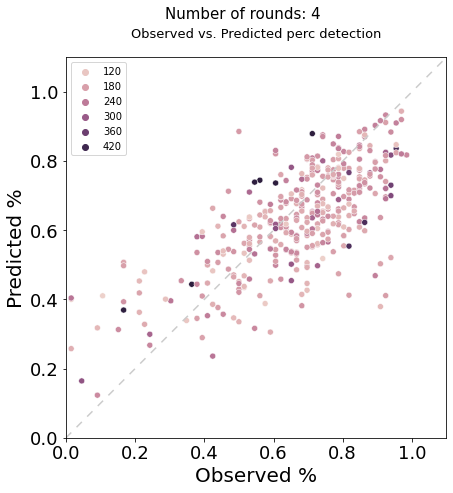

In [6]:
threshold=0.4
rounds_used=4
x_test, y_test=prepare_dataset_1(result, rounds_used)
auc, fpr, tpr, thresholds, loss, preds=evaluate_model(x_test, y_test, model4, threshold)
name_model="_r4_fold3"
approach=""
c=result["area"].tolist()
result["color"]=c
scatter_plot(preds.tolist(), y_test, result, 4)

This is the plot of the observed and predicted percentages colored by the size of the cell, which can also be interpreted as the padding that is added to the images